# 이번장에서 필요한 라이브러리 불러오기

In [2]:
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import pairwise
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates

# 데이터 불러오기

In [13]:
utilities_df = pd.read_csv('Utilities.csv')
utilities_df

,Company,Fixed_charge,RoR,Cost,Load_factor,Demand_growth,Sales,Nuclear,Fuel_Cost
0,Arizona,1.06,9.2,151,54.4,1.6,9077,0.0,0.628
1,Boston,0.89,10.3,202,57.9,2.2,5088,25.3,1.555
2,Central,1.43,15.4,113,53.0,3.4,9212,0.0,1.058
3,Commonwealth,1.02,11.2,168,56.0,0.3,6423,34.3,0.700
4,NY,1.49,8.8,192,51.2,1.0,3300,15.6,2.044
5,Florida,1.32,13.5,111,60.0,-2.2,11127,22.5,1.241
6,Hawaiian,1.22,12.2,175,67.6,2.2,7642,0.0,1.652
7,Idaho,1.10,9.2,245,57.0,3.3,13082,0.0,0.309
8,Kentucky,1.34,13.0,168,60.4,7.2,8406,0.0,0.862
9,Madison,1.12,12.4,197,53.0,2.7,6455,39.2,0.623


# 유클리드 거리를 사용해 계산된 처음 5개 회사의 거리행렬 출력

In [14]:
# set row names to the utilities column
utilities_df.set_index(keys = 'Company',inplace = True)

# while not required, the conversion of integer data to float
# will avoid a warning when applying the scale function
utilities_df = utilities_df.apply(lambda x: x.astype('float64'))

# compute Euclidean distance
d = pairwise.pairwise_distances(utilities_df, metric = 'euclidean')
pd.DataFrame(d, columns = utilities_df.index, index = utilities_df.index).iloc[:5,:5]

Company,Arizona,Boston,Central,Commonwealth,NY
Company,,,,,
Arizona,0.000000,3989.408076,140.402855,2654.277632,5777.167672
Boston,3989.408076,0.000000,4125.044132,1335.466502,1788.068027
Central,140.402855,4125.044132,0.000000,2789.759674,5912.552908
Commonwealth,2654.277632,1335.466502,2789.759674,0.000000,3123.153215
NY,5777.167672,1788.068027,5912.552908,3123.153215,0.000000


# Standardization한 거리 행렬 출력

In [15]:
# scikit-learn uses population standard deviation
# axis 0를 따라서 Standardization
# 방법1
utilities_df_norm = utilities_df.apply(preprocessing.scale,axis = 0)
utilities_df_norm

,Fixed_charge,RoR,Cost,Load_factor,Demand_growth,Sales,Nuclear,Fuel_Cost
Company,,,,,,,,
Arizona,-0.300057,-0.700750,-0.426938,-0.591310,-0.538611,0.046983,-0.731447,-0.873765
Boston,-1.243092,-0.199030,0.840322,0.211704,-0.341667,-1.103127,0.810687,0.832436
Central,1.752432,2.127130,-1.371171,-0.912516,0.052220,0.085906,-0.731447,-0.082323
Commonwealth,-0.521947,0.211469,-0.004518,-0.224218,-0.965322,-0.718219,1.359271,-0.741244
NY,2.085268,-0.883194,0.591840,-1.325495,-0.735555,-1.618644,0.219434,1.732470
Florida,1.142233,1.260521,-1.420868,0.693512,-1.785921,0.638040,0.640016,0.254499
Hawaiian,0.587506,0.667579,0.169420,2.437200,-0.341667,-0.366757,-0.731447,1.010970
Idaho,-0.078166,-0.700750,1.908797,0.005214,0.019396,1.201706,-0.731447,-1.460904
Kentucky,1.253178,1.032466,-0.004518,0.785285,1.299530,-0.146480,-0.731447,-0.443073


In [16]:
# pandas uses sample standard deviation
utilities_df_norm = (utilities_df-utilities_df.mean())/utilities_df.std()

# compute normalized distance based on Sales and Fuel cost
d_norm = pairwise.pairwise_distances(utilities_df_norm[['Sales','Fuel_Cost']],
                                    metric = 'euclidean')
pd.DataFrame(d_norm, columns = utilities_df.index, index = utilities_df.index).iloc[:5,:5]

Company,Arizona,Boston,Central,Commonwealth,NY
Company,,,,,
Arizona,1.490116e-08,2.010329,0.774179,0.758738,3.021907
Boston,2.010329e+00,0.000000,1.465703,1.582821,1.013370
Central,7.741795e-01,1.465703,0.000000,1.015710,2.432528
Commonwealth,7.587375e-01,1.582821,1.015710,0.000000,2.571969
NY,3.021907e+00,1.013370,2.432528,2.571969,0.000000


# Single linkage clustering과 Average linkage clustering을 적용한 결과

In [27]:
# in linkage() set argument method = 
# 'single', 'complete', 'average', 'weighted', 'centroid', 'median', 'ward'
Z = linkage(utilities_df_norm,method = 'single')
Z

array([[11.        , 20.        ,  1.38412377,  2.        ],
       [ 9.        , 12.        ,  1.40703194,  2.        ],
       [ 3.        , 23.        ,  1.49142689,  3.        ],
       [ 6.        , 22.        ,  1.66004682,  3.        ],
       [19.        , 24.        ,  1.81646484,  4.        ],
       [13.        , 18.        ,  1.87605148,  2.        ],
       [ 0.        , 17.        ,  1.87724763,  2.        ],
       [14.        , 25.        ,  2.09715032,  4.        ],
       [27.        , 28.        ,  2.11348964,  4.        ],
       [ 1.        , 26.        ,  2.16421261,  5.        ],
       [ 7.        , 15.        ,  2.20145718,  2.        ],
       [29.        , 31.        ,  2.31845126,  9.        ],
       [21.        , 33.        ,  2.42191624, 10.        ],
       [ 8.        , 30.        ,  2.42853301,  5.        ],
       [34.        , 35.        ,  2.45193526, 15.        ],
       [ 5.        , 36.        ,  2.58120817, 16.        ],
       [ 2.        , 37.

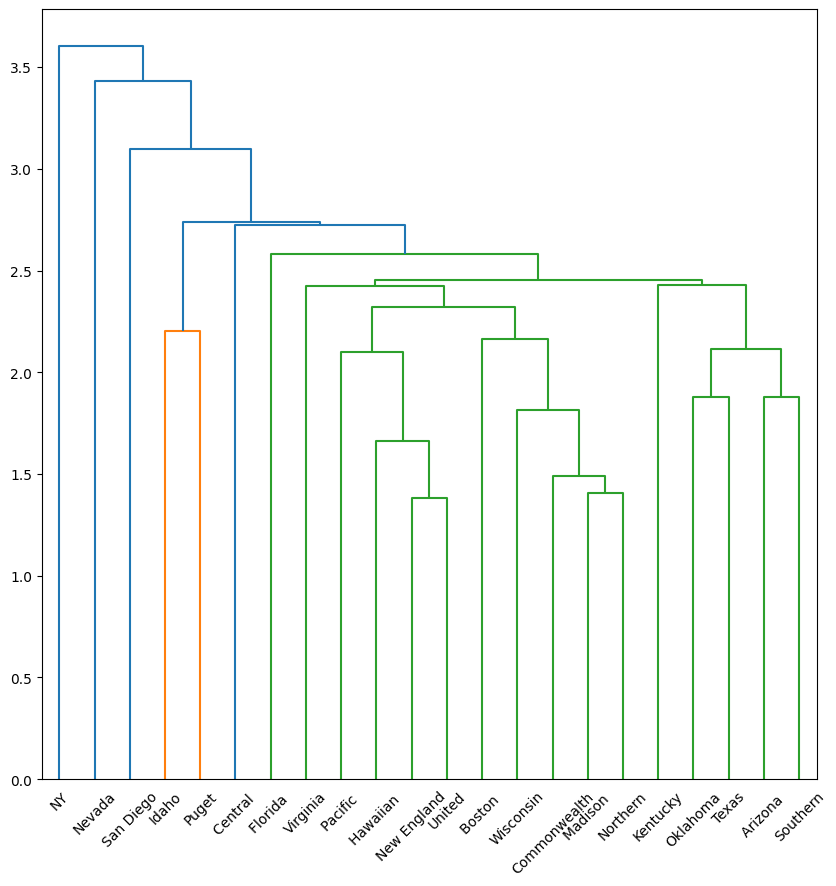

In [31]:
plt.figure(figsize =(10,10))
# color_threshold는 그룹을 나누는 기준을 정한다.
dendrogram(Z, labels = utilities_df_norm.index, color_threshold=2.7);

In [23]:
Z = linkage(utilities_df_norm,method = 'average')
Z

array([[11.        , 20.        ,  1.38412377,  2.        ],
       [ 9.        , 12.        ,  1.40703194,  2.        ],
       [ 3.        , 19.        ,  1.81646484,  2.        ],
       [13.        , 18.        ,  1.87605148,  2.        ],
       [ 0.        , 17.        ,  1.87724763,  2.        ],
       [23.        , 24.        ,  2.08732893,  4.        ],
       [ 6.        , 22.        ,  2.16772542,  3.        ],
       [ 7.        , 15.        ,  2.20145718,  2.        ],
       [25.        , 26.        ,  2.32466729,  4.        ],
       [ 1.        , 21.        ,  2.42191624,  2.        ],
       [14.        , 28.        ,  2.45204173,  4.        ],
       [27.        , 31.        ,  2.7247838 ,  6.        ],
       [ 2.        ,  8.        ,  2.7526226 ,  2.        ],
       [ 5.        , 30.        ,  3.12767159,  5.        ],
       [34.        , 35.        ,  3.26560262,  7.        ],
       [10.        , 29.        ,  3.44627474,  3.        ],
       [16.        , 32.

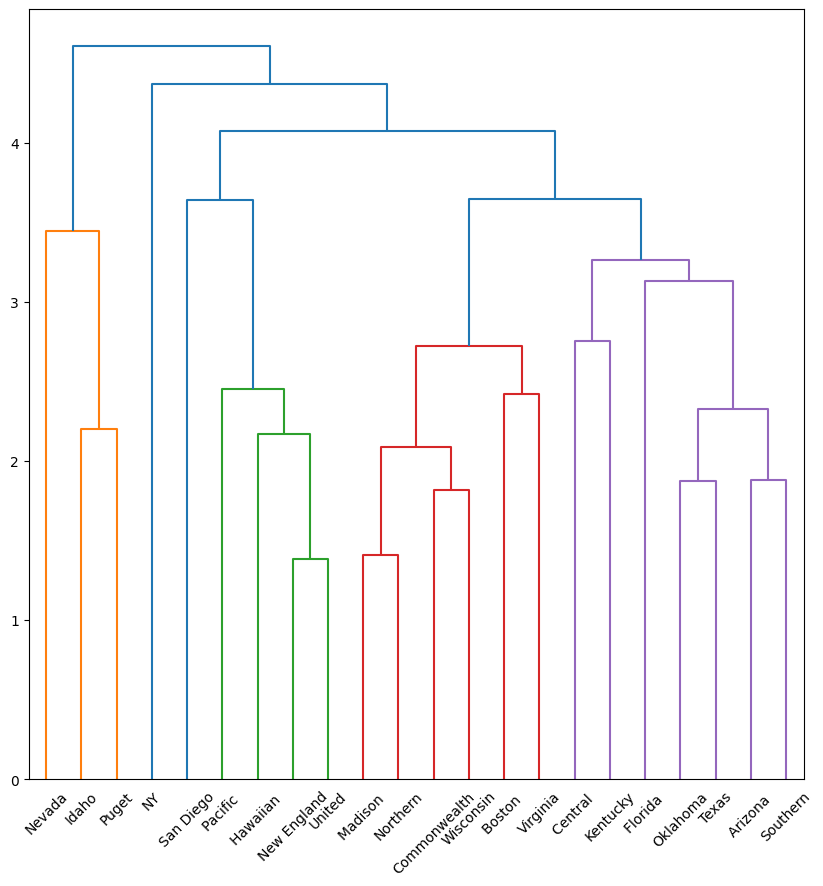

In [25]:
plt.figure(figsize =(10,10))
dendrogram(Z, labels = utilities_df_norm.index, color_threshold=3.6);

# fcluster() 함수를 사용해서 6개의 군집을 출력하기

In [32]:
memb = fcluster(linkage(utilities_df_norm,method = 'single'),6,criterion = 'maxclust')
memb

array([2, 2, 3, 2, 6, 2, 2, 1, 2, 2, 5, 2, 2, 2, 2, 1, 4, 2, 2, 2, 2, 2],
      dtype=int32)

In [33]:
memb = pd.Series(memb, index = utilities_df_norm.index)
memb

Company
Arizona         2
Boston          2
Central         3
Commonwealth    2
NY              6
Florida         2
Hawaiian        2
Idaho           1
Kentucky        2
Madison         2
Nevada          5
New England     2
Northern        2
Oklahoma        2
Pacific         2
Puget           1
San Diego       4
Southern        2
Texas           2
Wisconsin       2
United          2
Virginia        2
dtype: int32

In [39]:
for key,item in memb.groupby(memb):
    print(key,':',','.join(item.index))

1 : Idaho,Puget
2 : Arizona ,Boston ,Commonwealth,Florida ,Hawaiian ,Kentucky,Madison ,New England,Northern,Oklahoma,Pacific ,Southern,Texas,Wisconsin,United,Virginia
3 : Central 
4 : San Diego
5 : Nevada
6 : NY


In [40]:
memb = fcluster(linkage(utilities_df_norm,method = 'average'),6,criterion = 'maxclust')
memb

array([5, 4, 5, 4, 6, 5, 2, 1, 5, 4, 1, 2, 4, 5, 2, 1, 3, 5, 5, 4, 2, 4],
      dtype=int32)

In [41]:
memb = pd.Series(memb, index = utilities_df_norm.index)
memb

Company
Arizona         5
Boston          4
Central         5
Commonwealth    4
NY              6
Florida         5
Hawaiian        2
Idaho           1
Kentucky        5
Madison         4
Nevada          1
New England     2
Northern        4
Oklahoma        5
Pacific         2
Puget           1
San Diego       3
Southern        5
Texas           5
Wisconsin       4
United          2
Virginia        4
dtype: int32

In [42]:
for key,item in memb.groupby(memb):
    print(key,':',','.join(item.index))

1 : Idaho,Nevada,Puget
2 : Hawaiian ,New England,Pacific ,United
3 : San Diego
4 : Boston ,Commonwealth,Madison ,Northern,Wisconsin,Virginia
5 : Arizona ,Central ,Florida ,Kentucky,Oklahoma,Southern,Texas
6 : NY


# 히트맵을 생성하는 파이썬 코드

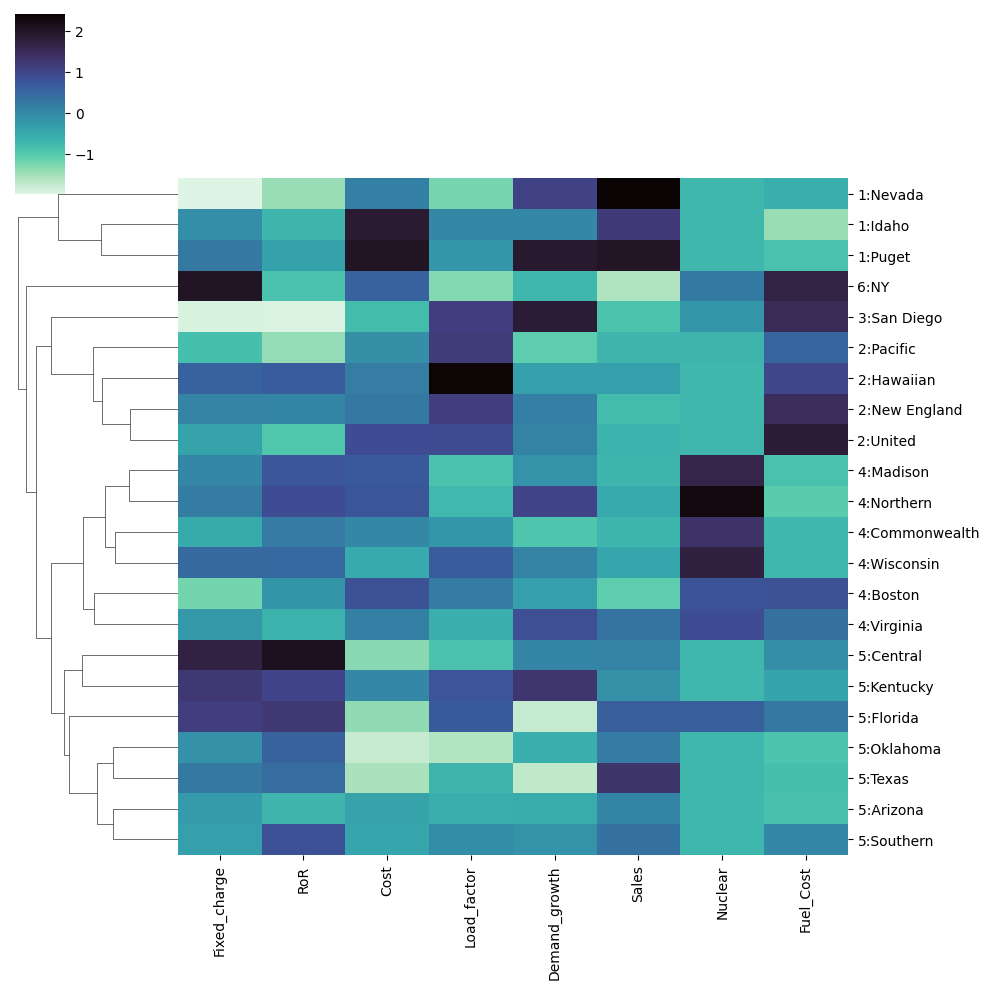

In [43]:
# set lables as cluster membership and utility name
utilities_df_norm.index = \
['{}:{}'.format(cluster,state) for cluster,state in zip(memb,utilities_df_norm.index)]

# plog heatmap
# the '_r' suffix reverses the color mapping to large = dark
sns.clustermap(utilities_df_norm,method='average',col_cluster=False,cmap='mako_r')